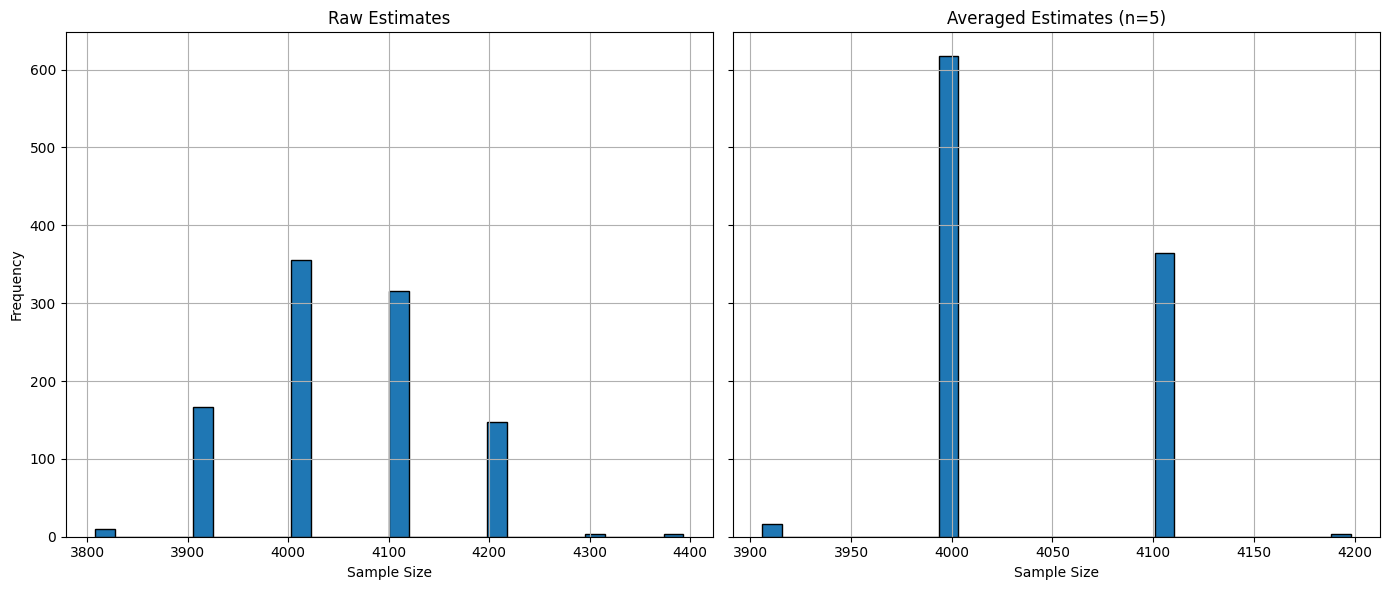

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from typing import List
from product_analytics.power_analysis import (
    _estimate_minimum_sample_size,
    power_analysis
)

# Sample parameters
runs = 1000
baseline_rate = 0.05
mde = 0.01
n_avg = 9
seed_base = 42

# Collect results for raw estimates
raw_results = []
avg_results = []

for i in range(runs):
    np.random.seed(seed_base + i)
    raw = _estimate_minimum_sample_size(
        baseline_rate=baseline_rate,
        minimum_detectable_effect=mde
    )
    averaged = power_analysis(
        baseline_rate=baseline_rate,
        minimum_detectable_effect=mde,
        n_runs=n_avg
    )
    if raw is not None:
        raw_results.append(raw)
    if averaged is not None:
        avg_results.append(averaged)

# Plot side-by-side histograms
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

axes[0].hist(raw_results, bins=30, edgecolor='black')
axes[0].set_title("Raw Estimates")
axes[0].set_xlabel("Sample Size")
axes[0].set_ylabel("Frequency")
axes[0].grid(True)

axes[1].hist(avg_results, bins=30, edgecolor='black')
axes[1].set_title("Averaged Estimates (n=5)")
axes[1].set_xlabel("Sample Size")
axes[1].grid(True)

plt.tight_layout()
plt.show()